Week 1: Intro to tech

In [82]:
import numpy as np
import uproot
import vector
import awkward
import matplotlib.pyplot as plt
import mplhep as hep

#directory = "/Users/archiebrooks/Documents/Uni/mphys project/"
directory = "c:/Users/matis/OneDrive/Documents/Y4/Project/"

hep.style.use('ATLAS')

Functions for plotting

In [83]:
def histogram(data, bins, data_label, axes, density=False, ratio=False, ratio_axes=None):
    if len(data[0]) != 1:
        global_min = min([np.min(d) for d in data])
        global_max = max([np.max(d) for d in data])

        bin_edges = np.linspace(global_min, global_max, bins+1)
        counts = []
        bin_width = bin_edges[1]-bin_edges[0]
        for i in range(len(data)):
            if type(data[i])!= 'numpy.ndarray':
                data[i] = np.array(data[i])
                hist = np.histogram(data[i], bins=bin_edges, density=density)[0]
            counts.append(hist.astype(float))
    else:
        counts, bin_edges = int(np.histogram(data, bins=bins, density=density))

    hep.histplot(counts, bin_edges, ax=axes, label=data_label, histtype='step')
    bin_width = bin_edges[1]-bin_edges[0]
    axes.set_ylabel(f'Events /{bin_width:.2f} GeV')
    axes.legend()

    if ratio:
        reference_counts = counts[0]
        for i in range(1, len(counts)):
            ratio_values = np.divide(counts[i], reference_counts, out=np.zeros_like(counts[i]), where=reference_counts != 0)
            hep.histplot(ratio_values, bin_edges, ax=ratio_axes, label=f'{data_label[i]}/{data_label[0]}')
        ratio_axes.set_ylabel("Ratio")
        ratio_axes.set_xlabel("Bin")
        ratio_axes.axhline(1, color='black', linestyle='--')  # Reference line at ratio=1
        ratio_axes.legend()

    hep.atlas.label(ax=axes)

Unpacking data 
1. Extracting 4 top data

In [84]:
tree4 = uproot.open(directory + 'MPHYS-4Top/4tops_partonic_skimmed_2409.root')['tree']
events = tree4.arrays(['top_pt', 'top_eta', 'top_phi', 'top_e', 'anti_top_pt', 'anti_top_eta', 'anti_top_phi', 'anti_top_e'])

for data in tree4.iterate(['top_pt', 'top_eta', 'top_phi', 'top_e', 'anti_top_pt', 'anti_top_eta', 'anti_top_phi', 'anti_top_e']):

    top_pt = awkward.to_numpy(data['top_pt'])
    top_e = awkward.to_numpy(data['top_e'])
    top_eta = awkward.to_numpy(data['top_eta'])
    antitop_eta = awkward.to_numpy(data['anti_top_eta'])


    filtered_top_pt = top_pt[(top_pt[:, 0] >= 250) & (top_pt[:, 1] >= 250)]
    filtered_top_e = top_e[(top_pt[:, 0] >= 250) & (top_pt[:, 1] >= 250)]
    filtered_top_eta = top_eta[(top_pt[:, 0] >= 250) & (top_pt[:, 1] >= 250)]
    filtered_antitop_eta = antitop_eta[(top_pt[:, 0] >= 250) & (top_pt[:, 1] >= 250)]

2. Extracting 3 top data

In [85]:
tree3W = uproot.open(directory + 'MPHYS-4Top/3tops_tttW_partonic_skimmed_2609.root')['tree']
events3W = tree3W.arrays(['top_pt', 'top_eta', 'top_phi', 'top_e', 'anti_top_pt', 'anti_top_eta', 'anti_top_phi', 'anti_top_e'])

events3W['pt'] = awkward.concatenate([events3W['top_pt'],events3W['anti_top_pt']], axis=1)
events3W['eta'] = awkward.concatenate([events3W['top_eta'],events3W['anti_top_eta']], axis=1)
events3W['phi'] = awkward.concatenate([events3W['top_phi'],events3W['anti_top_phi']], axis=1)
events3W['e'] = awkward.concatenate([events3W['top_e'],events3W['anti_top_e']], axis=1)
print(events3W['e'])

mask_tttbarW = (awkward.num(events3W['top_pt']) == 2) & (awkward.num(events3W['anti_top_pt']) == 1)
mask_ttbartbarW = (awkward.num(events3W['top_pt']) == 1) & (awkward.num(events3W['anti_top_pt']) == 2)
tttbarW = events3W[mask_tttbarW]
ttbartbarW = events3W[mask_ttbartbarW]

tree3j = uproot.open(directory + 'MPHYS-4Top/3tops_tttj_partonic_skimmed_2609.root')['tree']
events3j = tree3j.arrays(['top_pt', 'top_eta', 'top_phi', 'top_e', 'anti_top_pt', 'anti_top_eta', 'anti_top_phi', 'anti_top_e'])

events3j['pt'] = awkward.concatenate([events3j['top_pt'],events3j['anti_top_pt']], axis=1)
events3j['eta'] = awkward.concatenate([events3j['top_eta'],events3j['anti_top_eta']], axis=1)
events3j['phi'] = awkward.concatenate([events3j['top_phi'],events3j['anti_top_phi']], axis=1)
events3j['e'] = awkward.concatenate([events3j['top_e'],events3j['anti_top_e']], axis=1)
print(events3j['e'])

mask_tttbarj = (awkward.num(events3j['top_pt']) == 2) & (awkward.num(events3j['anti_top_pt']) == 1)
mask_ttbartbarj = (awkward.num(events3j['top_pt']) == 1) & (awkward.num(events3j['anti_top_pt']) == 2)
tttbarj = events3j[mask_tttbarj]
ttbartbarj = events3j[mask_ttbartbarj]

[[253, 389, 219], [1.69e+03, 751, 1.08e+03], ..., [277, ...], [395, 487, 444]]
[[427, 235, 684], [705, 530, 755], [...], ..., [331, 213, 424], [384, 394, 443]]


3. Plotting Histograms

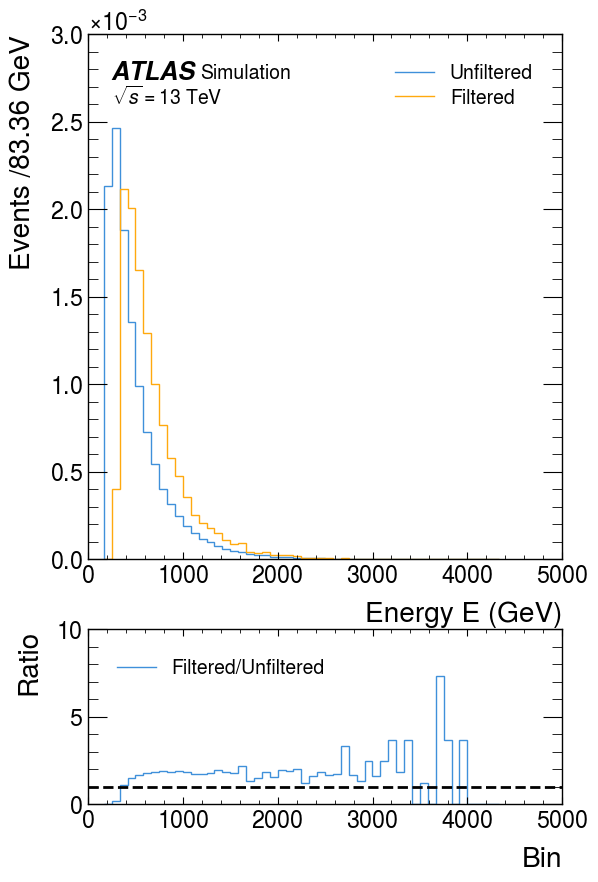

In [120]:
split_top_e = top_e.reshape(100000,1)
split_filtered_top_e = filtered_top_e.reshape(13634,1)

fig, ax = plt.subplots(nrows = 2, ncols = 1, gridspec_kw={'height_ratios': [3, 1]}, figsize=(6,10))
histogram([split_top_e, split_filtered_top_e], 50, ['Unfiltered','Filtered'], ax[0], density = True, ratio=True, ratio_axes=ax[1])
ax[0].set_xlabel(r"Energy E (GeV)")
ax[0].legend()
plt.show()

In [87]:
split_antitop_eta = antitop_eta.reshape(100000,1)
split_filtered_antitop_eta = filtered_antitop_eta.reshape(13634,1)
split_top_eta = top_eta.reshape(100000,1)
split_filtered_top_eta = filtered_top_eta.reshape(13634,1)

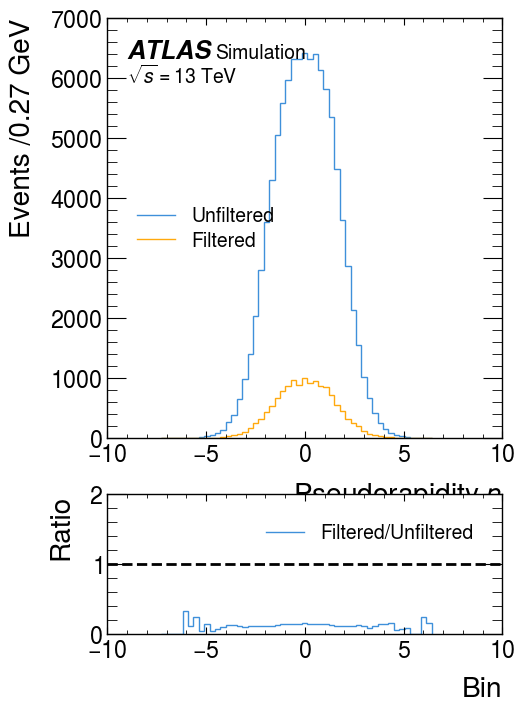

In [121]:
fig, ax = plt.subplots(nrows = 2, ncols = 1, gridspec_kw={'height_ratios': [3, 1]}, figsize=(5,8))
histogram([split_antitop_eta,split_filtered_antitop_eta], 50, ['Unfiltered', 'Filtered'], ax[0], ratio=True, ratio_axes=ax[1])
ax[0].set_xlabel(r"Pseudorapidity $\eta$")
ax[0].legend()
plt.show()

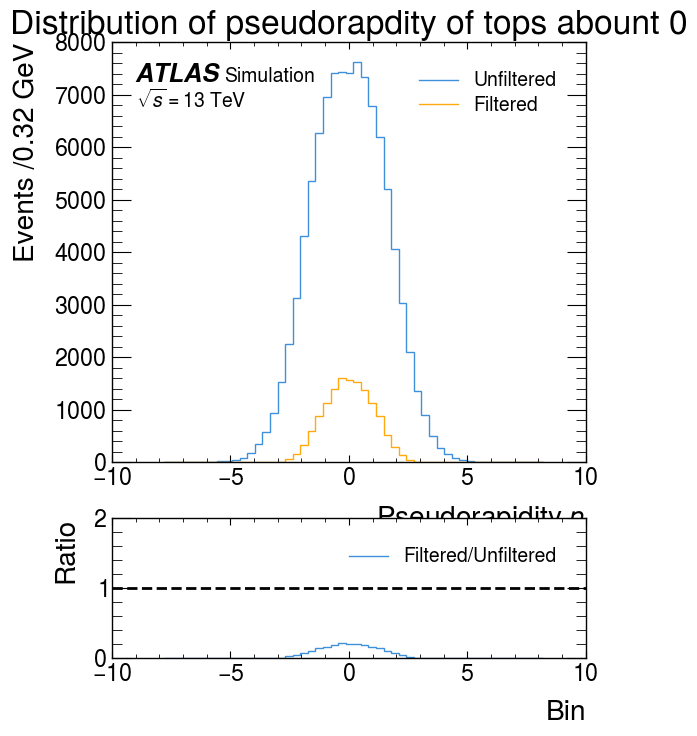

In [89]:
fig, ax = plt.subplots(nrows = 2, ncols = 1, gridspec_kw={'height_ratios': [3, 1]}, figsize=(6,8))
histogram([split_top_eta,split_filtered_top_eta], 50, ['Unfiltered', 'Filtered'], ax[0], ratio=True, ratio_axes=ax[1])
ax[0].set_title("Distribution of pseudorapdity of tops abount 0")
ax[0].set_xlabel(r"Pseudorapidity $\eta$")
ax[0].legend()
plt.show()

Vectors
1. 4 top Masks/Filters

In [90]:
pt_mask_1 = events['top_pt'][:, 0] > 50
pt_mask_2 = events['top_pt'][:, 1] > 50

eta_mask_1 = (events['top_eta'][:, 0] > -2.4) & (events['top_eta'][:, 0] < 2.4)
eta_mask_2 = (events['top_eta'][:, 1] > -2.4) & (events['top_eta'][:, 1] < 2.4)

anti_pt_mask_1 = events['anti_top_pt'][:, 0] > 50
anti_pt_mask_2 = events['anti_top_pt'][:, 1] > 50

anti_eta_mask_1 = (events['anti_top_eta'][:, 0] > -2.4) & (events['anti_top_eta'][:, 0] < 2.4)
anti_eta_mask_2 = (events['anti_top_eta'][:, 1] > -2.4) & (events['anti_top_eta'][:, 1] < 2.4)

masks = pt_mask_1 & pt_mask_2 & eta_mask_1 & eta_mask_2 & anti_pt_mask_1 & anti_pt_mask_2 & anti_eta_mask_1 & anti_eta_mask_2

2. 3 top Masks/Filters

In [91]:
pt_mask_3tW_1 = events3W['pt'][:,0] > 50
pt_mask_3tW_2 = events3W['pt'][:,1] > 50
pt_mask_3tW_3 = events3W['pt'][:,2] > 50

eta_mask_3tW_1 = (events3W['eta'][:, 0] > -2.4) & (events3W['eta'][:, 0] < 2.4)
eta_mask_3tW_2 = (events3W['eta'][:, 1] > -2.4) & (events3W['eta'][:, 1] < 2.4)
eta_mask_3tW_3 = (events3W['eta'][:, 2] > -2.4) & (events3W['eta'][:, 2] < 2.4)

masks_3tW = pt_mask_3tW_1 & pt_mask_3tW_2 & pt_mask_3tW_3 & eta_mask_3tW_1 & eta_mask_3tW_2 & eta_mask_3tW_3

pt_mask_3tj_1 = events3j['pt'][:,0] > 50
pt_mask_3tj_2 = events3j['pt'][:,1] > 50
pt_mask_3tj_3 = events3j['pt'][:,2] > 50

eta_mask_3tj_1 = (events3j['eta'][:, 0] > -2.4) & (events3j['eta'][:, 0] < 2.4)
eta_mask_3tj_2 = (events3j['eta'][:, 1] > -2.4) & (events3j['eta'][:, 1] < 2.4)
eta_mask_3tj_3 = (events3j['eta'][:, 2] > -2.4) & (events3j['eta'][:, 2] < 2.4)

masks_3tj = pt_mask_3tj_1 & pt_mask_3tj_2 & pt_mask_3tj_3 & eta_mask_3tj_1 & eta_mask_3tj_2 & eta_mask_3tj_3

2. Top AntiTop individual awkward vecors

In [92]:
tops = vector.zip({'pt':events['top_pt'],'eta':events['top_eta'],'phi':events['top_phi'], 'mass':172.76})
anti_tops = vector.zip({'pt':events['anti_top_pt'],'eta':events['anti_top_eta'],'phi':events['anti_top_phi'], 'mass':172.76})

filtered_tops= tops[masks]
filtered_anti_tops = anti_tops[masks]

3. 1a. 4top events seperated into individual top channels + filtered

In [93]:
top1 = vector.zip({'pt':events['top_pt'][:,0],'eta':events['top_eta'][:,0],'phi':events['top_phi'][:,0], 'mass':172.76})
top2 = vector.zip({'pt':events['top_pt'][:,1],'eta':events['top_eta'][:,1],'phi':events['top_phi'][:,1], 'mass':172.76})
anti_top1 = vector.zip({'pt':events['anti_top_pt'][:,0],'eta':events['anti_top_eta'][:,0],'phi':events['anti_top_phi'][:,0], 'mass':172.76})
anti_top2 = vector.zip({'pt':events['anti_top_pt'][:,1],'eta':events['anti_top_eta'][:,1],'phi':events['anti_top_phi'][:,1], 'mass':172.76})

filtered_top1 = top1[masks]
filtered_top2 = top2[masks]
filtered_anti_top1 = anti_top1[masks]
filtered_anti_top2 = anti_top2[masks]

four_tops = top1+top2+anti_top1+anti_top2
filtered_4_tops = filtered_top1+filtered_top2+filtered_anti_top1+filtered_anti_top2
filtered_4_tops = filtered_4_tops[filtered_4_tops.mass > 1500]

3. 1b. 3top events seperated into individual channels + filtered

In [94]:
top1_3tW = vector.zip({'pt':events3W['pt'][:,0],'eta':events3W['eta'][:,0],'phi':events3W['phi'][:,0], 'mass':172.76})
top2_3tW = vector.zip({'pt':events3W['pt'][:,1],'eta':events3W['eta'][:,1],'phi':events3W['phi'][:,1], 'mass':172.76})
top3_3tW = vector.zip({'pt':events3W['pt'][:,2],'eta':events3W['eta'][:,2],'phi':events3W['phi'][:,2], 'mass':172.76})

filtered_top1_3tW = top1_3tW[masks_3tW]
filtered_top2_3tW = top2_3tW[masks_3tW]
filtered_top3_3tW = top3_3tW[masks_3tW]

all_filtered_3tW = awkward.concatenate([awkward.Array([filtered_top1_3tW]),awkward.Array([filtered_top2_3tW]), awkward.Array([filtered_top3_3tW])], axis=0)

top1_3tj = vector.zip({'pt':events3j['pt'][:,0],'eta':events3j['eta'][:,0],'phi':events3j['phi'][:,0], 'mass':172.76})
top2_3tj = vector.zip({'pt':events3j['pt'][:,1],'eta':events3j['eta'][:,1],'phi':events3j['phi'][:,1], 'mass':172.76})
top3_3tj = vector.zip({'pt':events3j['pt'][:,2],'eta':events3j['eta'][:,2],'phi':events3j['phi'][:,2], 'mass':172.76})

filtered_top1_3tj = top1_3tj[masks_3tj]
filtered_top2_3tj = top2_3tj[masks_3tj]
filtered_top3_3tj = top3_3tj[masks_3tj]

all_filtered_3tj = awkward.concatenate([awkward.Array([filtered_top1_3tj]),awkward.Array([filtered_top2_3tj]), awkward.Array([filtered_top3_3tj])], axis=0)

3.2a Extracting deltaR values for highest and second highest pt tops

In [95]:
all_4tops = awkward.concatenate([awkward.Array([top1]),awkward.Array([top2]),awkward.Array([anti_top1]),awkward.Array([anti_top2])], axis=0)
all_filtered_4tops = awkward.concatenate([awkward.Array([filtered_top1]),awkward.Array([filtered_top2]),awkward.Array([filtered_anti_top1]),awkward.Array([filtered_anti_top2])], axis=0)

transposed_4tops = np.transpose(all_4tops)
sorted_indices = np.argsort(transposed_4tops.rho)
trans_sorted_4tops = transposed_4tops[sorted_indices]
highest_pt_top = vector.zip({'pt':trans_sorted_4tops.rho[:,-1],'eta':trans_sorted_4tops.eta[:,-1],'phi':trans_sorted_4tops.phi[:,-1], 'mass':172.76})
second_highest_pt_top = vector.zip({'pt':trans_sorted_4tops.rho[:,-2],'eta':trans_sorted_4tops.eta[:,-2],'phi':trans_sorted_4tops.phi[:,-2], 'mass':172.76})

transposed_filtered_4tops = np.transpose(all_filtered_4tops)
sorted_indices = np.argsort(transposed_filtered_4tops.rho)
trans_sorted_filtered_4tops = transposed_filtered_4tops[sorted_indices]
highest_pt_filtered_top = vector.zip({'pt':trans_sorted_filtered_4tops.rho[:,-1],'eta':trans_sorted_filtered_4tops.eta[:,-1],'phi':trans_sorted_filtered_4tops.phi[:,-1], 'mass':172.76})
second_highest_pt_filtered_top = vector.zip({'pt':trans_sorted_filtered_4tops.rho[:,-2],'eta':trans_sorted_filtered_4tops.eta[:,-2],'phi':trans_sorted_filtered_4tops.phi[:,-2], 'mass':172.76})

deltaR_values = highest_pt_top.deltaR(second_highest_pt_top)
filtered_deltaR_values = highest_pt_filtered_top.deltaR(second_highest_pt_filtered_top)

In [96]:
sorted_indices = awkward.argsort(all_4tops.rho, axis=0)
sorted_4tops = all_4tops[sorted_indices]
print(all_4tops.rho)
print(sorted_4tops.rho)

[[99.3, 82.9, 96, 77.9, 330, 111, ..., 299, 9.79, 8.35, 184, 156, 117], ...]
[[82.9, 99.3, 99.3, 99.3, 96, 82.9, ..., 82.9, 99.3, 99.3, 82.9, 96, 82.9], ...]


4. Plotting Histograms for invariant mass distributions and DeltaR values

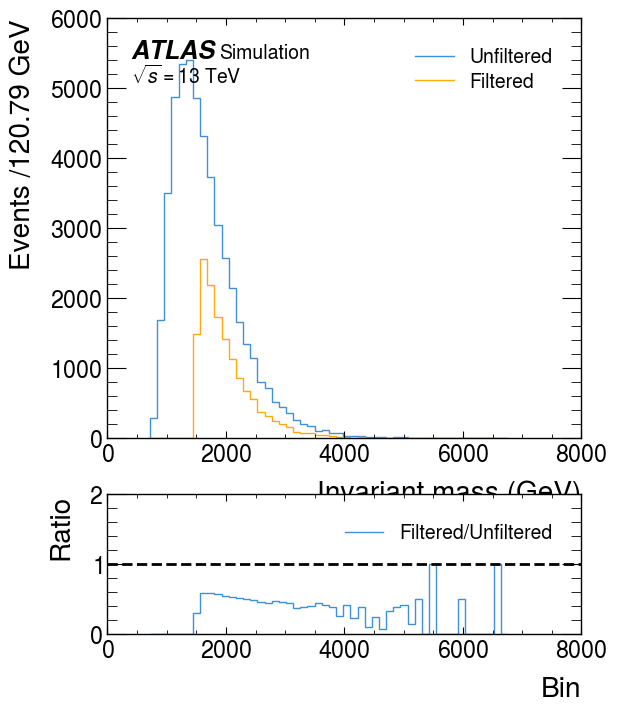

In [97]:
fig, ax = plt.subplots(nrows = 2, ncols = 1, gridspec_kw={'height_ratios': [3, 1]},figsize = (6,8))
histogram([np.array(four_tops.mass),np.array(filtered_4_tops.mass)], 50, ['Unfiltered', 'Filtered'], ax[0], ratio=True, ratio_axes=ax[1])
ax[0].set_xlabel('Invariant mass (GeV)')
plt.show()

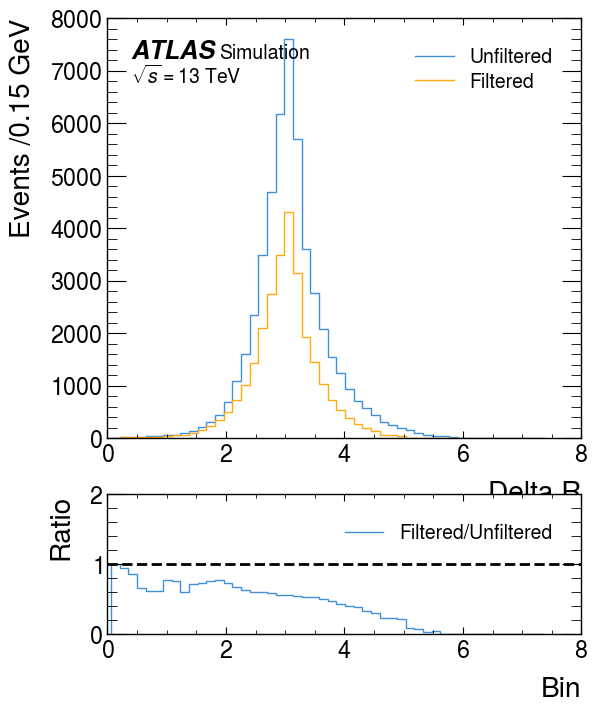

In [98]:
fig, ax = plt.subplots(nrows = 2, ncols = 1, gridspec_kw={'height_ratios': [3, 1]},figsize = (6,8))
histogram([deltaR_values,filtered_deltaR_values], 50, ['Unfiltered', 'Filtered'], ax[0], ratio=True, ratio_axes=ax[1])
ax[0].set_xlabel('Delta R')
plt.show()

Comparing 3tW and 3tj data sets

1. Extracting the highest pt top in each event

In [99]:
all_4tops = awkward.concatenate([awkward.Array([top1]),awkward.Array([top2]),awkward.Array([anti_top1]),awkward.Array([anti_top2])], axis=0)
all_filtered_4tops = awkward.concatenate([awkward.Array([filtered_top1]),awkward.Array([filtered_top2]),awkward.Array([filtered_anti_top1]),awkward.Array([filtered_anti_top2])], axis=0)



In [100]:
transposed_4tops = np.transpose(all_filtered_4tops)
sorted_indices = np.argsort(transposed_4tops.rho)
trans_sorted_4tops = transposed_4tops[sorted_indices]

highest_pt_top = vector.zip({'pt':trans_sorted_4tops.rho[:,-1],'eta':trans_sorted_4tops.eta[:,-1],'phi':trans_sorted_4tops.phi[:,-1], 'mass':172.76})
second_highest_pt_top = vector.zip({'pt':trans_sorted_4tops.rho[:,2],'eta':trans_sorted_4tops.eta[:,2],'phi':trans_sorted_4tops.phi[:,2], 'mass':172.76})
lowest_pt_4t = vector.zip({'pt':trans_sorted_4tops.rho[:,0],'eta':trans_sorted_4tops.eta[:,0],'phi':trans_sorted_4tops.phi[:,0], 'mass':172.76})
second_lowest_pt_4t = vector.zip({'pt':trans_sorted_4tops.rho[:,1],'eta':trans_sorted_4tops.eta[:,1],'phi':trans_sorted_4tops.phi[:,1], 'mass':172.76})

middle_pt_4t = (trans_sorted_4tops.rho[:,1] + trans_sorted_4tops.rho[:,2])/2
average_pt_4t = (trans_sorted_4tops.rho[:,0]+trans_sorted_4tops.rho[:,1]+trans_sorted_4tops.rho[:,2]+trans_sorted_4tops.rho[:,3])/4



Highest eta

In [101]:
sorted_indices_4t_eta = np.argsort(transposed_4tops.eta)
trans_sorted_4tops_eta = transposed_4tops[sorted_indices_4t_eta]

highest_eta_4t = vector.zip({'pt':trans_sorted_4tops_eta.rho[:,-1],'eta':trans_sorted_4tops_eta.eta[:,-1],'phi':trans_sorted_4tops_eta.phi[:,-1], 'mass':172.76})
lowest_eta_4t = vector.zip({'pt':trans_sorted_4tops_eta.rho[:,0],'eta':trans_sorted_4tops_eta.eta[:,0],'phi':trans_sorted_4tops_eta.phi[:,0], 'mass':172.76})


In [102]:
all_filtered_3tW = awkward.concatenate([awkward.Array([filtered_top1_3tW]),awkward.Array([filtered_top2_3tW]), awkward.Array([filtered_top3_3tW])], axis=0)
all_filtered_3tj = awkward.concatenate([awkward.Array([filtered_top1_3tj]),awkward.Array([filtered_top2_3tj]), awkward.Array([filtered_top3_3tj])], axis=0)

transposed_3tW = np.transpose(all_filtered_3tW)
sorted_indices = np.argsort(transposed_3tW.rho)
trans_sorted_3tW = transposed_3tW[sorted_indices]
highest_pt_top = vector.zip({'pt':trans_sorted_4tops.rho[:,-1],'eta':trans_sorted_4tops.eta[:,-1],'phi':trans_sorted_4tops.phi[:,-1], 'mass':172.76})


In [103]:
transposed_3tW = np.transpose(all_filtered_3tW)
sorted_indices = np.argsort(transposed_3tW.rho)
trans_sorted_3tW = transposed_3tW[sorted_indices]
highest_pt_3tW = vector.zip({'pt':trans_sorted_3tW.rho[:,-1],'eta':trans_sorted_3tW.eta[:,-1],'phi':trans_sorted_3tW.phi[:,-1], 'mass':172.76})

transposed_3tj = np.transpose(all_filtered_3tj)
sorted_indices = np.argsort(transposed_3tj.rho)
trans_sorted_3tj = transposed_3tj[sorted_indices]
highest_pt_3tj = vector.zip({'pt':trans_sorted_3tj.rho[:,-1],'eta':trans_sorted_3tj.eta[:,-1],'phi':trans_sorted_3tj.phi[:,-1], 'mass':172.76})

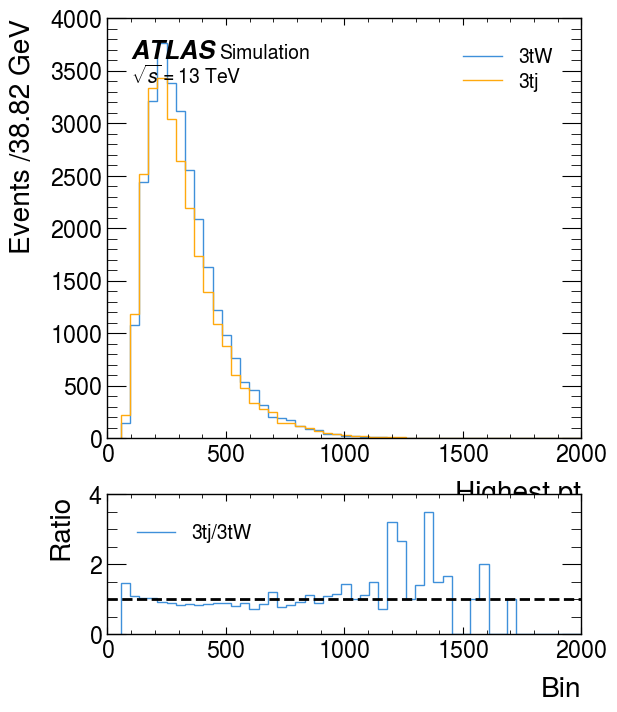

In [104]:
fig, ax = plt.subplots(nrows = 2, ncols = 1, gridspec_kw={'height_ratios': [3, 1]},figsize = (6,8))
histogram([highest_pt_3tW.rho, highest_pt_3tj.rho], 50, ['3tW', '3tj'], ax[0], ratio=True, ratio_axes=ax[1])
ax[0].set_xlabel('Highest pt')
plt.show()

Combining 3tW and 3tj

In [105]:
combined_3t = awkward.concatenate([awkward.Array(all_filtered_3tj),awkward.Array(all_filtered_3tW)], axis = 1)

Extracting pT and other values

In [106]:
transposed_3t = np.transpose(combined_3t)
sorted_indices_3t = np.argsort(transposed_3t.rho)
trans_sorted_3t = transposed_3t[sorted_indices_3t]
highest_pt_3t = vector.zip({'pt':trans_sorted_3t.rho[:,-1],'eta':trans_sorted_3t.eta[:,-1],'phi':trans_sorted_3t.phi[:,-1], 'mass':172.76})
second_highest_pt_3t = vector.zip({'pt':trans_sorted_3t.rho[:,-2],'eta':trans_sorted_3t.eta[:,-2],'phi':trans_sorted_3t.phi[:,-2], 'mass':172.76})
lowest_pt_3t = vector.zip({'pt':trans_sorted_3t.rho[:,0],'eta':trans_sorted_3t.eta[:,0],'phi':trans_sorted_3t.phi[:,0], 'mass':172.76})
second_lowest_pt_3t = vector.zip({'pt':trans_sorted_3t.rho[:,1],'eta':trans_sorted_3t.eta[:,1],'phi':trans_sorted_3t.phi[:,1], 'mass':172.76})
average_pt_3t = (trans_sorted_3t.rho[:,0]+trans_sorted_3t.rho[:,1]+trans_sorted_3t.rho[:,2])/3

Sorting based on eta

In [107]:
sorted_indices_3t_eta = np.argsort(transposed_3t.eta)
trans_sorted_3t_eta = transposed_3t[sorted_indices_3t_eta]
highest_eta_3t = vector.zip({'pt':trans_sorted_3t_eta.rho[:,-1],'eta':trans_sorted_3t_eta.eta[:,-1],'phi':trans_sorted_3t_eta.phi[:,-1], 'mass':172.76})
lowest_eta_3t = vector.zip({'pt':trans_sorted_3t_eta.rho[:,0],'eta':trans_sorted_3t_eta.eta[:,0],'phi':trans_sorted_3t_eta.phi[:,0], 'mass':172.76})


In [108]:
deltaR_3t = highest_pt_3t.deltaR(second_highest_pt_3t)

In [109]:
sorted_indices_3t_eta = np.argsort(transposed_3t.eta)
trans_sorted_3t_eta = transposed_3t[sorted_indices_3t_eta]
highest_eta_3t = vector.zip({'pt':trans_sorted_3t_eta.rho[:,2],'eta':trans_sorted_3t_eta.eta[:,2],'phi':trans_sorted_3t_eta.phi[:,2], 'mass':172.76})

Plots

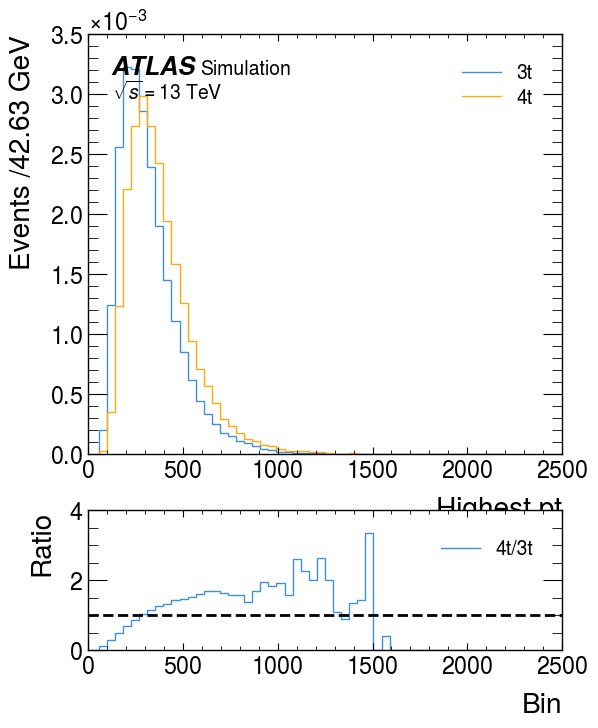

In [110]:
fig, ax = plt.subplots(nrows = 2, ncols = 1, gridspec_kw={'height_ratios': [3, 1]},figsize = (6,8))
histogram([highest_pt_3t.rho, highest_pt_top.rho], 50, ['3t', '4t'], ax[0],density=True, ratio=True, ratio_axes=ax[1])
ax[0].set_xlabel('Highest pt')
plt.show()

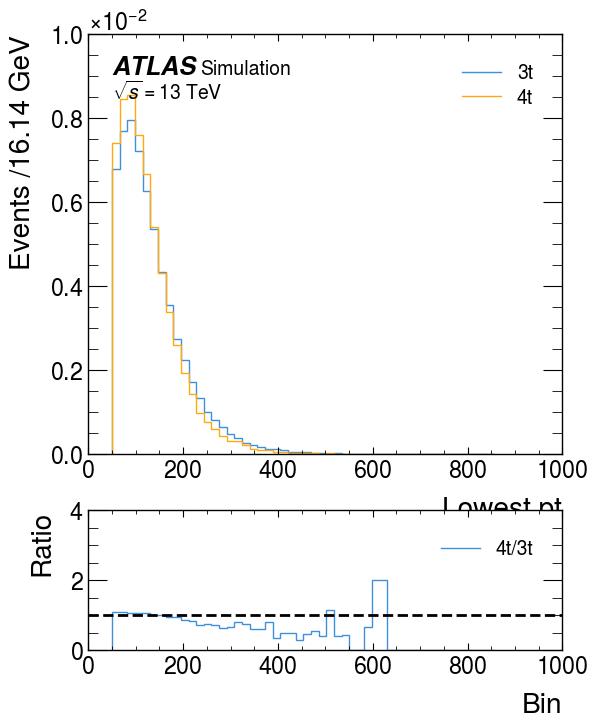

In [111]:
fig, ax = plt.subplots(nrows = 2, ncols = 1, gridspec_kw={'height_ratios': [3, 1]},figsize = (6,8))
histogram([lowest_pt_3t.rho, lowest_pt_4t.rho], 50, ['3t', '4t'], ax[0],density=True, ratio=True, ratio_axes=ax[1])
ax[0].set_xlabel('Lowest pt')
plt.show()

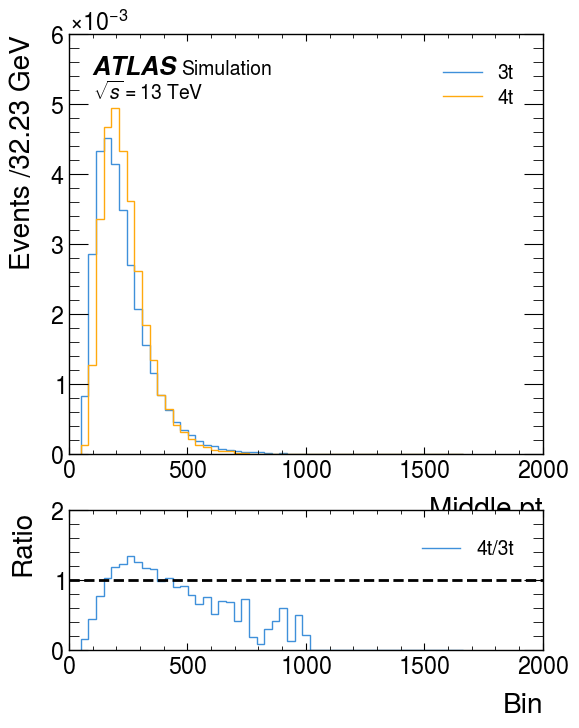

In [112]:
fig, ax = plt.subplots(nrows = 2, ncols = 1, gridspec_kw={'height_ratios': [3, 1]},figsize = (6,8))
histogram([second_highest_pt_3t.rho, middle_pt_4t], 50, ['3t', '4t'], ax[0],density=True, ratio=True, ratio_axes=ax[1])
ax[0].set_xlabel('Middle pt')
plt.show()

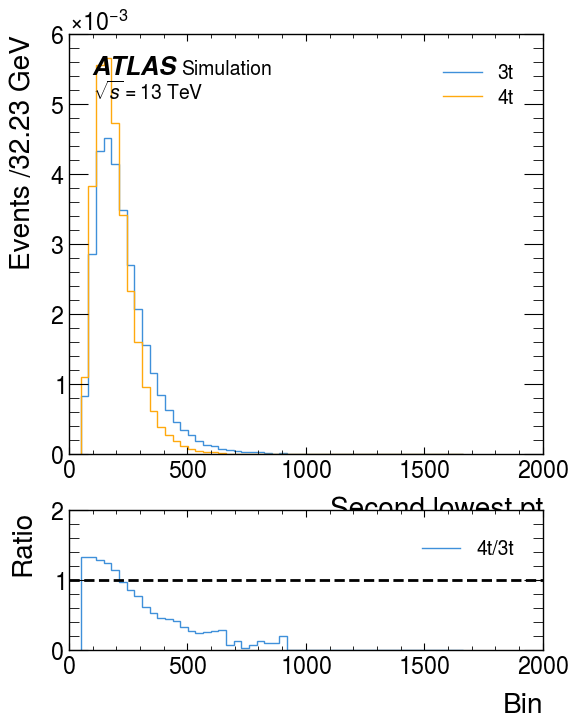

In [113]:
fig, ax = plt.subplots(nrows = 2, ncols = 1, gridspec_kw={'height_ratios': [3, 1]},figsize = (6,8))
histogram([second_lowest_pt_3t.rho, second_lowest_pt_4t.rho], 50, ['3t', '4t'], ax[0],density=True, ratio=True, ratio_axes=ax[1])
ax[0].set_xlabel('Second lowest pt')
plt.show()

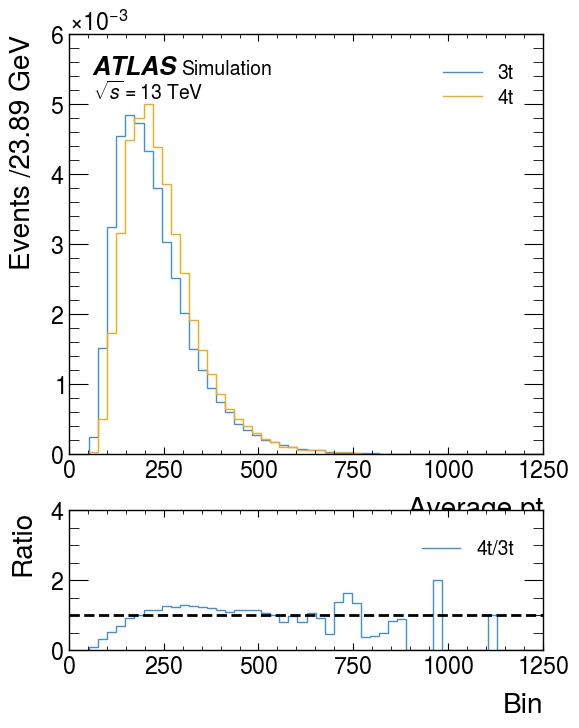

In [114]:
fig, ax = plt.subplots(nrows = 2, ncols = 1, gridspec_kw={'height_ratios': [3, 1]},figsize = (6,8))
histogram([average_pt_3t, average_pt_4t], 50, ['3t', '4t'], ax[0],density=True, ratio=True, ratio_axes=ax[1])
ax[0].set_xlabel('Average pt')
plt.show()

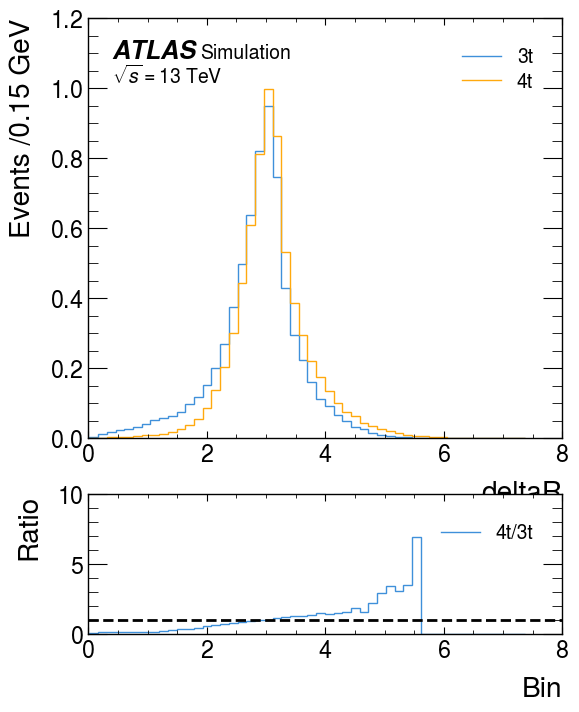

In [115]:
fig, ax = plt.subplots(nrows = 2, ncols = 1, gridspec_kw={'height_ratios': [3, 1]},figsize = (6,8))
histogram([deltaR_3t,deltaR_values], 50, ['3t', '4t'], ax[0],density=True, ratio=True, ratio_axes=ax[1])
ax[0].set_xlabel('deltaR')
plt.show()

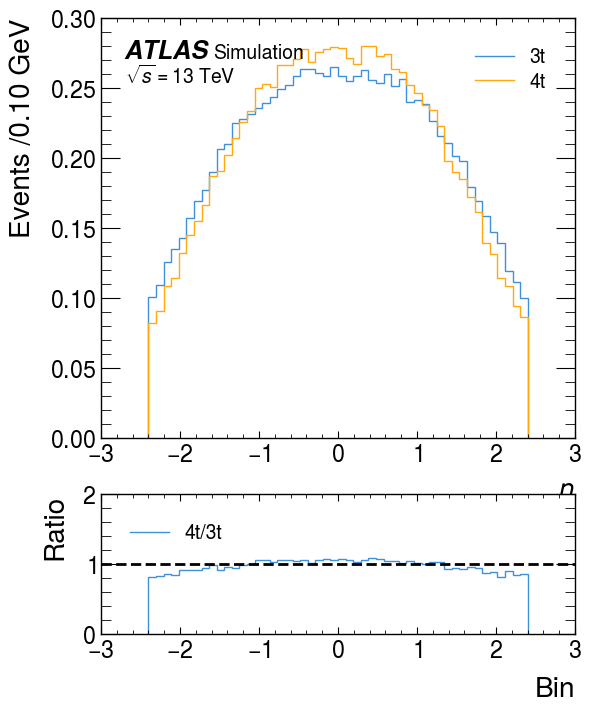

In [116]:
fig, ax = plt.subplots(nrows = 2, ncols = 1, gridspec_kw={'height_ratios': [3, 1]},figsize = (6,8))
histogram([transposed_3t.eta, transposed_4tops.eta], 50, ['3t', '4t'], ax[0],density=True, ratio=True, ratio_axes=ax[1])
ax[0].set_xlabel('$\eta$')
plt.show()

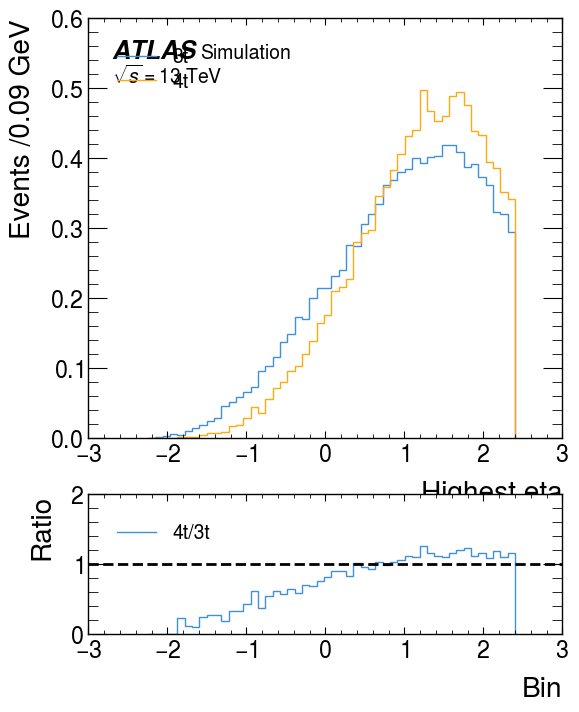

In [117]:
fig, ax = plt.subplots(nrows = 2, ncols = 1, gridspec_kw={'height_ratios': [3, 1]},figsize = (6,8))
histogram([highest_eta_3t.eta,highest_eta_4t.eta], 50, ['3t', '4t'], ax[0],density=True, ratio=True, ratio_axes=ax[1])
ax[0].set_xlabel('Highest eta')
plt.show()

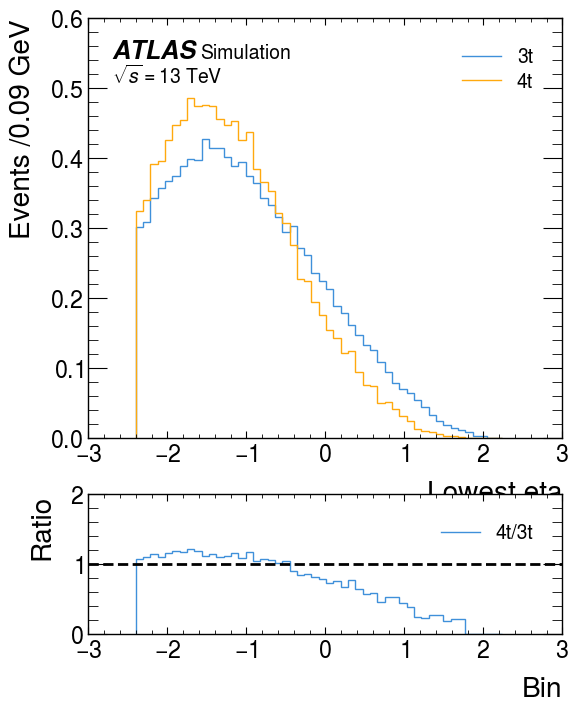

In [118]:
fig, ax = plt.subplots(nrows = 2, ncols = 1, gridspec_kw={'height_ratios': [3, 1]},figsize = (6,8))
histogram([lowest_eta_3t.eta,lowest_eta_4t.eta], 50, ['3t', '4t'], ax[0],density=True, ratio=True, ratio_axes=ax[1])
ax[0].set_xlabel('Lowest eta')
plt.show()

Same bin edges vs different bin edges

In [ ]:
def histogram(data, bins, data_label, axes, density=False):
    if len(data[0]) != 1:
        global_min = min([np.min(d) for d in data])
        global_max = max([np.max(d) for d in data])

        bin_edges = np.linspace(global_min, global_max, bins+1)
        counts = []
        for i in range(len(data)):
            counts.append(np.histogram(data[i], bins=bin_edges, density=density)[0])
    else:
        counts, bin_edges = np.histogram(data, bins=bins, density=density)
    hep.histplot(counts, bin_edges, ax=axes, label=data_label, histtype='step')
    hep.atlas.label(ax=axes)

3 top masks attempt 1

In [105]:
tttbarW_pt_mask_1 = tttbarW['top_pt'][:,0] > 50
tttbarW_pt_mask_2 = tttbarW['top_pt'][:,1] > 50
tttbarW_anti_pt_mask = tttbarW['anti_top_pt'][:,0] > 50

tttbarW_eta_mask_1 = (tttbarW['top_eta'][:, 0] > -2.4) & (tttbarW['top_eta'][:, 0] < 2.4)
tttbarW_eta_mask_2 = (tttbarW['top_eta'][:, 1] > -2.4) & (tttbarW['top_eta'][:, 1] < 2.4)
tttbarW_anti_eta_mask = (tttbarW['anti_top_eta'][:, 0] > -2.4) & (tttbarW['anti_top_eta'][:, 0] < 2.4)

tttbarW_masks = tttbarW_pt_mask_1 & tttbarW_pt_mask_2 & tttbarW_anti_pt_mask & tttbarW_eta_mask_1 & tttbarW_eta_mask_2 & tttbarW_anti_eta_mask

ttbartbarW_pt_mask = ttbartbarW['top_pt'][:,0] > 50
ttbartbarW_anti_pt_mask_1 = ttbartbarW['anti_top_pt'][:,0] > 50
ttbartbarW_anti_pt_mask_2 = ttbartbarW['anti_top_pt'][:,1] > 50

ttbartbarW_eta_mask = (ttbartbarW['top_eta'][:, 0] > -2.4) & (ttbartbarW['top_eta'][:, 0] < 2.4)
ttbartbarW_anti_eta_mask_1 = (ttbartbarW['anti_top_eta'][:, 0] > -2.4) & (ttbartbarW['anti_top_eta'][:, 0] < 2.4)
ttbartbarW_anti_eta_mask_2 = (ttbartbarW['anti_top_eta'][:, 1] > -2.4) & (ttbartbarW['anti_top_eta'][:, 1] < 2.4)

ttbartbarW_masks = ttbartbarW_pt_mask & ttbartbarW_anti_pt_mask_1 & ttbartbarW_anti_pt_mask_2 & ttbartbarW_eta_mask & ttbartbarW_anti_eta_mask_1 & ttbartbarW_anti_eta_mask_2

tttbarj_pt_mask_1 = tttbarj['top_pt'][:,0] > 50
tttbarj_pt_mask_2 = tttbarj['top_pt'][:,1] > 50
tttbarj_anti_pt_mask = tttbarj['anti_top_pt'][:,0] > 50

tttbarj_eta_mask_1 = (tttbarj['top_eta'][:, 0] > -2.4) & (tttbarj['top_eta'][:, 0] < 2.4)
tttbarj_eta_mask_2 = (tttbarj['top_eta'][:, 1] > -2.4) & (tttbarj['top_eta'][:, 1] < 2.4)
tttbarj_anti_eta_mask = (tttbarj['anti_top_eta'][:, 0] > -2.4) & (tttbarj['anti_top_eta'][:, 0] < 2.4)

tttbarj_masks = tttbarj_pt_mask_1 & tttbarj_pt_mask_2 & tttbarj_anti_pt_mask & tttbarj_eta_mask_1 & tttbarj_eta_mask_2 & tttbarj_anti_eta_mask

ttbartbarj_pt_mask = ttbartbarj['top_pt'][:,0] > 50
ttbartbarj_anti_pt_mask_1 = ttbartbarj['anti_top_pt'][:,0] > 50
ttbartbarj_anti_pt_mask_2 = ttbartbarj['anti_top_pt'][:,1] > 50

ttbartbarj_eta_mask = (ttbartbarj['top_eta'][:, 0] > -2.4) & (ttbartbarj['top_eta'][:, 0] < 2.4)
ttbartbarj_anti_eta_mask_1 = (ttbartbarj['anti_top_eta'][:, 0] > -2.4) & (ttbartbarj['anti_top_eta'][:, 0] < 2.4)
ttbartbarj_anti_eta_mask_2 = (ttbartbarj['anti_top_eta'][:, 1] > -2.4) & (ttbartbarj['anti_top_eta'][:, 1] < 2.4)

ttbartbarj_masks = ttbartbarj_pt_mask & ttbartbarj_anti_pt_mask_1 & ttbartbarj_anti_pt_mask_2 & ttbartbarj_eta_mask & ttbartbarj_anti_eta_mask_1 & ttbartbarj_anti_eta_mask_2

Old method for sorting pts

In [ ]:
pts = awkward.Array([top1.pt, top2.pt, anti_top1.pt, anti_top2.pt])

sorted_pts = awkward.sort(pts, axis=0, ascending=False)

max_pts = sorted_pts[0,:]
second_max_pts = sorted_pts[1,:]

deltaRs = []
for i in range(len(top1)):
    if max_pts[i] == top1[i].pt:
        if second_max_pts[i] == top2[i].pt:
            deltaRs.append(top1[i].deltaR(top2[i]))
        elif second_max_pts[i] == anti_top1[i].pt:
            deltaRs.append(top1[i].deltaR(anti_top1[i]))
        elif second_max_pts[i] == anti_top2[i].pt:
            deltaRs.append(top1[i].deltaR(anti_top2[i]))
    
    elif max_pts[i] == top2[i].pt:
        if second_max_pts[i] == top1[i].pt:
            deltaRs.append(top2[i].deltaR(top1[i]))
        elif second_max_pts[i] == anti_top1[i].pt:
            deltaRs.append(top2[i].deltaR(anti_top1[i]))
        elif second_max_pts[i] == anti_top2[i].pt:
            deltaRs.append(top2[i].deltaR(anti_top2[i]))

    elif max_pts[i] == anti_top1[i].pt:
        if second_max_pts[i] == top1[i].pt:
            deltaRs.append(anti_top1[i].deltaR(top1[i]))
        elif second_max_pts[i] == top2[i].pt:
            deltaRs.append(anti_top1[i].deltaR(top2[i]))
        elif second_max_pts[i] == anti_top2[i].pt:
            deltaRs.append(anti_top1[i].deltaR(anti_top2)[i])

    elif max_pts[i] == anti_top2[i].pt:
        if second_max_pts[i] == top1[i].pt:
            deltaRs.append(anti_top2[i].deltaR(top1[i]))
        elif second_max_pts[i] == top2[i].pt:
            deltaRs.append(anti_top2[i].deltaR(top2[i]))
        elif second_max_pts[i] == anti_top1[i].pt:
            deltaRs.append(anti_top2[i].deltaR(anti_top1[i]))

filtered_pts = awkward.Array([filtered_top1.pt, filtered_top2.pt, filtered_anti_top1.pt, filtered_anti_top2.pt])

filtered_sorted_pts = awkward.sort(filtered_pts, axis=0, ascending=False)

filtered_max_pts = filtered_sorted_pts[0,:]
filtered_second_max_pts = filtered_sorted_pts[1,:]

filtered_deltaRs = []
for i in range(len(filtered_top1)):
    if filtered_max_pts[i] == filtered_top1[i].pt:
        if filtered_second_max_pts[i] == filtered_top2[i].pt:
            filtered_deltaRs.append(filtered_top1[i].deltaR(filtered_top2[i]))
        elif filtered_second_max_pts[i] == filtered_anti_top1[i].pt:
            filtered_deltaRs.append(filtered_top1[i].deltaR(filtered_anti_top1[i]))
        elif filtered_second_max_pts[i] == filtered_anti_top2[i].pt:
            filtered_deltaRs.append(filtered_top1[i].deltaR(filtered_anti_top2[i]))
    
    elif filtered_max_pts[i] == filtered_top2[i].pt:
        if filtered_second_max_pts[i] == filtered_top1[i].pt:
            filtered_deltaRs.append(filtered_top2[i].deltaR(filtered_top1[i]))
        elif filtered_second_max_pts[i] == filtered_anti_top1[i].pt:
            filtered_deltaRs.append(filtered_top2[i].deltaR(filtered_anti_top1[i]))
        elif filtered_second_max_pts[i] == filtered_anti_top2[i].pt:
            filtered_deltaRs.append(filtered_top2[i].deltaR(filtered_anti_top2[i]))

    elif filtered_max_pts[i] == filtered_anti_top1[i].pt:
        if filtered_second_max_pts[i] == filtered_top1[i].pt:
            filtered_deltaRs.append(filtered_anti_top1[i].deltaR(filtered_top1[i]))
        elif filtered_second_max_pts[i] == filtered_top2[i].pt:
            filtered_deltaRs.append(filtered_anti_top1[i].deltaR(filtered_top2[i]))
        elif filtered_second_max_pts[i] == filtered_anti_top2[i].pt:
            filtered_deltaRs.append(filtered_anti_top1[i].deltaR(filtered_anti_top2)[i])

    elif filtered_max_pts[i] == filtered_anti_top2[i].pt:
        if filtered_second_max_pts[i] == filtered_top1[i].pt:
            filtered_deltaRs.append(filtered_anti_top2[i].deltaR(filtered_top1[i]))
        elif filtered_second_max_pts[i] == filtered_top2[i].pt:
            filtered_deltaRs.append(filtered_anti_top2[i].deltaR(filtered_top2[i]))
        elif filtered_second_max_pts[i] == filtered_anti_top1[i].pt:
            filtered_deltaRs.append(filtered_anti_top2[i].deltaR(filtered_anti_top1[i]))
